### Import modules

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pickle
import seaborn as sns

from collections import Counter
from typing import Final

### Define constants

In [2]:
SENT_BEG: Final = '<s>'
SENT_END: Final = '</s>'

In [3]:
def read_from_pickle(filepath):
    """Read an object from a pickle file
    Parameters:
        filepath (str): path to the pickle file
    Returns:
        Any: the object in the file"""
    
    obj = None
    
    with open(filepath, 'rb') as pckl:
        obj = pickle.load(pckl)
        
    return obj

In [4]:
ttl_sents = read_from_pickle('./Pickles/ttl_sents.pickle')
ttl_counts = read_from_pickle('./Pickles/ttl_counts.pickle')

atw_sents = read_from_pickle('./Pickles/atw_sents.pickle')
atw_counts = read_from_pickle('./Pickles/atw_counts.pickle')

### Sentence Metrics

In [5]:
def sentence_metrics(sentences: list, name, minus = 2) -> None:
    """Get sentence metrics, and plot them
    Parameters:
        sentences (list): a list of tokens in each sentence
        name (str): the name of the text
        minus (int): number of words to ignore per sentence (default: 2 i.e. <s> and </s>)
    Returns:
        None"""
    
    words = []
    
    for sentence in sentences:
        words.append(len(sentence) - minus)
        
    words = pd.Series(words)
        
    print('Number of sentences:', len(sentences))
    print('Mean length of a sentence:', np.mean(words))
    print('Median length of a sentence:', np.median(words))
    print('Max sentence length:', words.max())
    print('Min sentence length:', words.min())
    
    fig, ax = plt.subplots(figsize = (12, 8))
    plt.plot(range(1, len(sentences) + 1), words, alpha = 0.5, color = '#00788c', label = 'Number of words')
    plt.plot(range(1, len(sentences) + 1), words.rolling(100).mean(), color = '#552583', label = '100-sentence rolling avg.')
    plt.title('{} - Sentences'.format(name))
    plt.xlabel('Sentence')
    plt.ylabel('Number of Words')
    plt.legend()
    plt.show()
    plt.close()
    
#     plt.hist(words, bins = 40, density = True, log = True, color = '#00788c')
    sns.displot(words, kind = 'kde', color = '#552583')
#     plt.yscale('log')
    plt.title('{} - Words per Sentence KDE'.format(name))
    plt.xlabel('Words')
    plt.ylabel('')
    plt.show()
    plt.close()

Number of sentences: 6587
Mean length of a sentence: 15.815090329436769
Median length of a sentence: 14.0
Max sentence length: 181
Min sentence length: 1


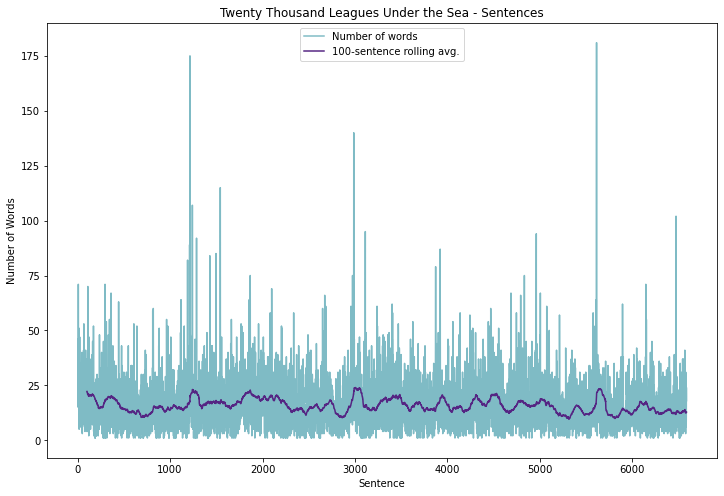

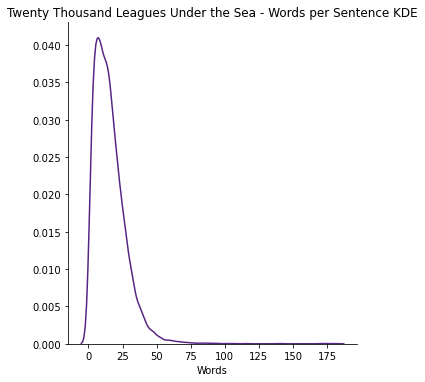

In [6]:
sentence_metrics(ttl_sents, 'Twenty Thousand Leagues Under the Sea')

Number of sentences: 2876
Mean length of a sentence: 22.374826147426983
Median length of a sentence: 20.0
Max sentence length: 176
Min sentence length: 0


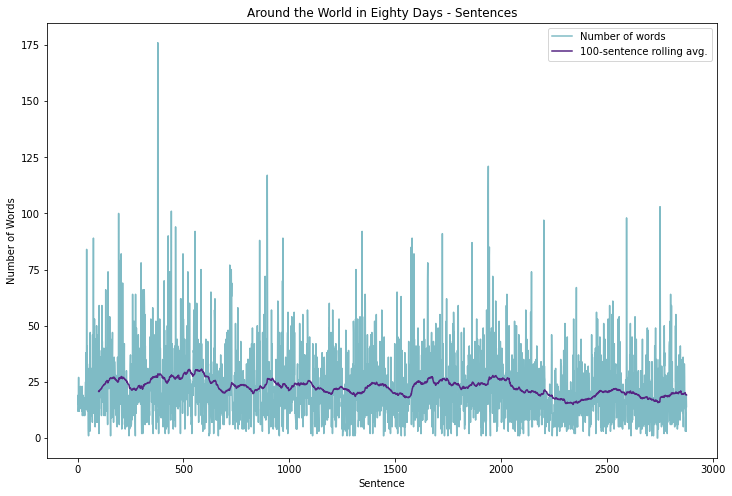

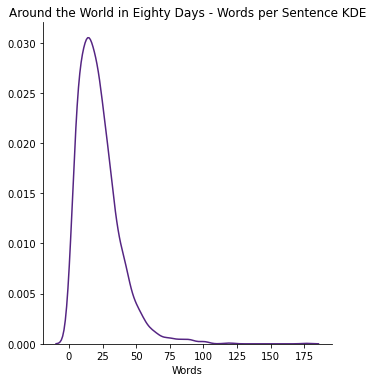

In [7]:
sentence_metrics(atw_sents, 'Around the World in Eighty Days')